In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

dataset=pd.read_csv("/content/forestfires.csv")

x2 = dataset.iloc[:,0:10].values
y2 = dataset.iloc[:,10].values



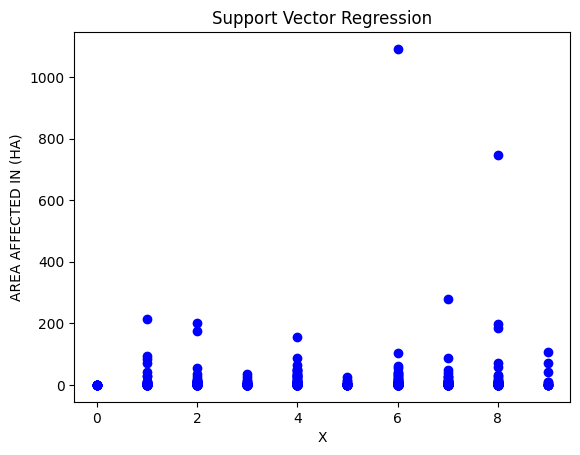

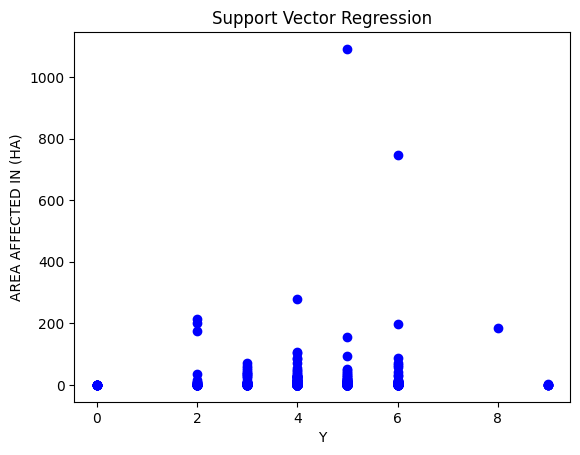

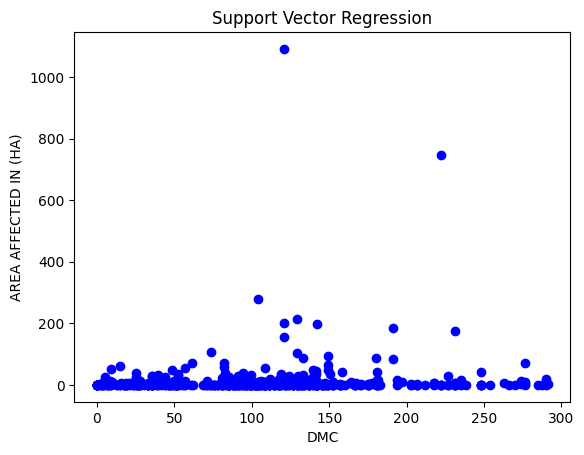

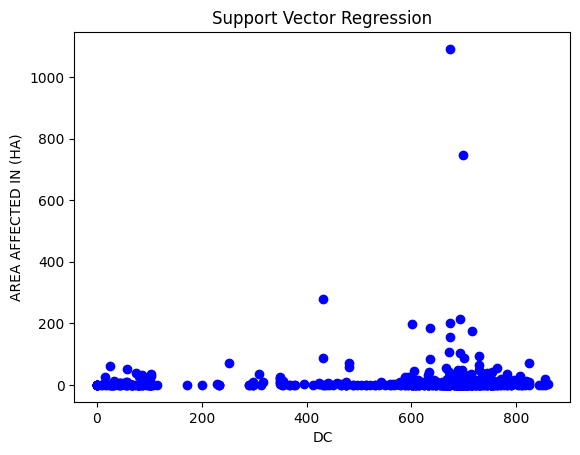

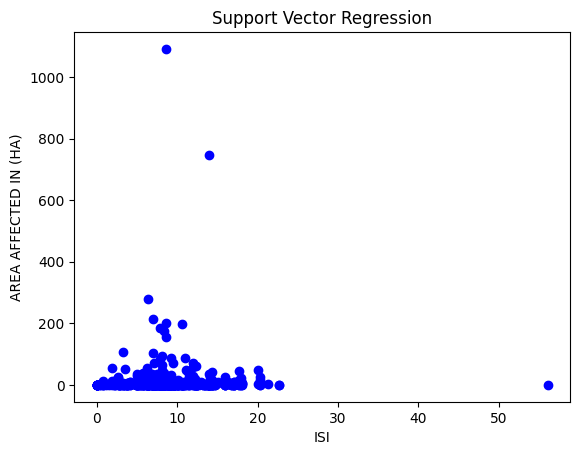

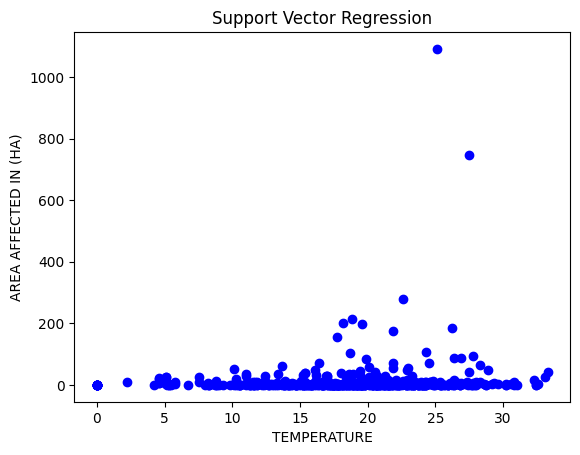

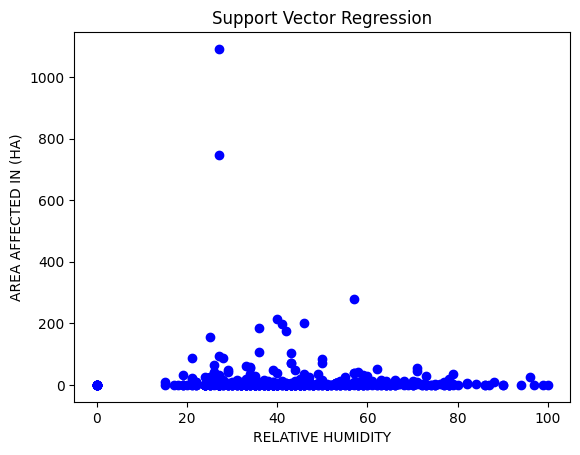

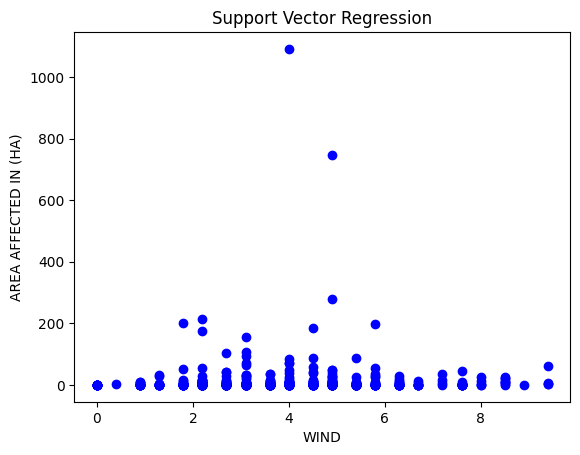

In [5]:
arr=['X','Y','months','days','DMC','DC','ISI','TEMPERATURE','RELATIVE HUMIDITY','WIND']
for i in range(10):
    if(i==2 or i==3):
        continue
    else:
        x1=x2[:,i]
        plt.scatter(x1,y2,color='blue')
        plt.xlabel(arr[i])
        plt.ylabel('AREA AFFECTED IN (HA)')
        plt.title('Support Vector Regression')
        plt.show()

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'area'}>]], dtype=object)

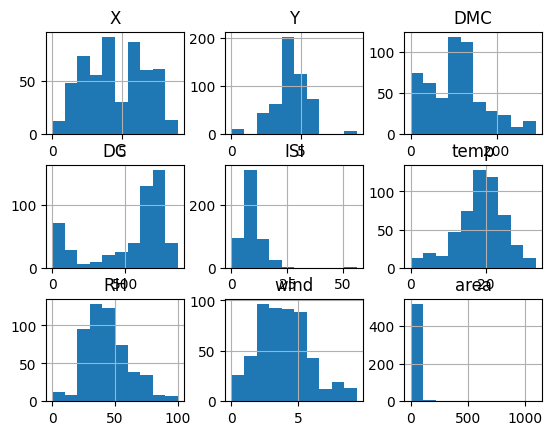

In [6]:
dataset.hist()

In [8]:
dataset1=pd.read_csv("/content/forestfires.csv")

Text(0, 0.5, 'AREA AFFECTED IN (HA)')

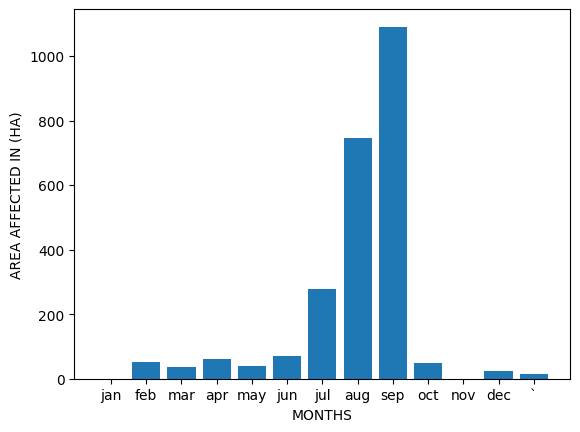

In [9]:
x1=dataset1.iloc[:,2]
y1=dataset1.iloc[:,10].values
x2=dataset1.iloc[:,3]
plt.bar(x1,y1)
plt.xlabel('MONTHS')
plt.ylabel('AREA AFFECTED IN (HA)')

Text(0, 0.5, 'AREA AFFECTED IN (HA)')

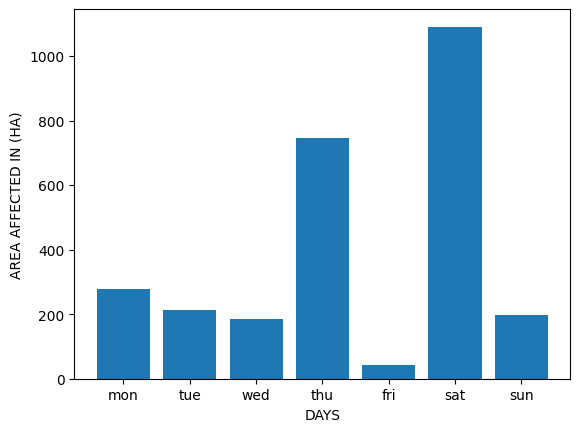

In [10]:
plt.bar(x2,y1)
plt.xlabel('DAYS')
plt.ylabel('AREA AFFECTED IN (HA)')


In [26]:
le = LabelEncoder()

dataset['month']=le.fit_transform(dataset['month'])
dataset['day']=le.fit_transform(dataset['day'])
dataset.isnull().any()

x = dataset.iloc[:,0:10].values
y = dataset.iloc[:,10].values


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scalar = StandardScaler()
model= SVR()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_pred, y_test)
msg = " %f (%f)" % ( score, mae)
print(msg)



[[ 2.   4.   2.  ... 27.9 33.   2.2]
 [ 7.   4.   2.  ... 16.3 60.   5.4]
 [ 4.   5.   4.  ... 10.1 62.   1.8]
 ...
 [ 8.   3.  12.  ... 24.2 28.   3.6]
 [ 7.   4.  11.  ... 11.3 60.   5.4]
 [ 1.   2.  12.  ... 25.3 36.   3.6]]
 0.000052 (23.389994)


<ipython-input-12-8169ce495700>:9: RuntimeWarning: overflow encountered in double_scalars
  if np.abs(10**m[i]-10**n[i])<=tol:


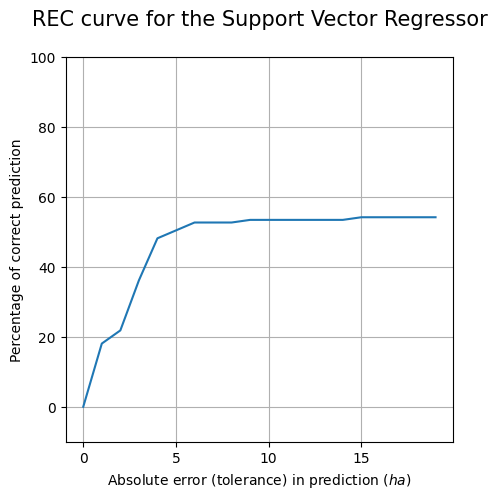

In [12]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

tol_max=20
rec_SVR=[]
for i in range(tol_max):
    rec_SVR.append(rec(y_pred,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Support Vector Regressor\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_SVR)


In [28]:
x_test
y_pred

array([0.34756487, 0.52437848, 0.16530746, 0.68951029, 0.63685852,
       0.66410523, 0.37315249, 0.49827861, 0.18218483, 0.06577536,
       0.52686786, 0.34266598, 0.61556342, 0.79630291, 0.6144576 ,
       0.56393444, 0.61641613, 0.18719734, 0.13541959, 0.39406967,
       0.60727774, 0.11817346, 0.62877054, 0.17303055, 0.60384094,
       0.56197185, 0.48081533, 0.5148674 , 0.62735193, 0.50329111,
       0.71016608, 0.68184678, 0.22653313, 0.27727958, 0.60010893,
       0.74407562, 0.65318563, 0.69559587, 0.69096379, 0.16242293,
       0.16402328, 0.12956258, 0.60017489, 0.68090669, 0.60740986,
       0.54123698, 0.20626719, 0.62552483, 0.17324275, 0.17060533,
       0.49420093, 0.59349169, 0.66909585, 0.65698714, 0.68564508,
       0.56555631, 0.11486811, 0.44377491, 0.65170432, 0.21961285,
       0.66186668, 0.64091921, 0.52707856, 0.18255947, 0.60289178,
       0.1827984 , 0.16242293, 0.16732275, 0.54839653, 0.06952728,
       0.60962366, 0.70308396, 0.10242979, 0.58911044, 0.79870

In [29]:
prediction = model.predict(x_test)
prediction


array([0.34756487, 0.52437848, 0.16530746, 0.68951029, 0.63685852,
       0.66410523, 0.37315249, 0.49827861, 0.18218483, 0.06577536,
       0.52686786, 0.34266598, 0.61556342, 0.79630291, 0.6144576 ,
       0.56393444, 0.61641613, 0.18719734, 0.13541959, 0.39406967,
       0.60727774, 0.11817346, 0.62877054, 0.17303055, 0.60384094,
       0.56197185, 0.48081533, 0.5148674 , 0.62735193, 0.50329111,
       0.71016608, 0.68184678, 0.22653313, 0.27727958, 0.60010893,
       0.74407562, 0.65318563, 0.69559587, 0.69096379, 0.16242293,
       0.16402328, 0.12956258, 0.60017489, 0.68090669, 0.60740986,
       0.54123698, 0.20626719, 0.62552483, 0.17324275, 0.17060533,
       0.49420093, 0.59349169, 0.66909585, 0.65698714, 0.68564508,
       0.56555631, 0.11486811, 0.44377491, 0.65170432, 0.21961285,
       0.66186668, 0.64091921, 0.52707856, 0.18255947, 0.60289178,
       0.1827984 , 0.16242293, 0.16732275, 0.54839653, 0.06952728,
       0.60962366, 0.70308396, 0.10242979, 0.58911044, 0.79870